In [157]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# modelling the arrival process

# per second converyor belt

conveyor1=1
# c1 uses the distribution that tells us how likely the time of the next arrival
# a random value. 
conveyor2=2/3

In [159]:
# Exponential Random Number Algorithm
def poisson_est(mean):
    r=np.exp(-mean)
    N=0.0
    s=1.0
    s*=np.random.random()
    while s>r:
        N+=1
        s*=np.random.random()
    else:
        return N

In [160]:
sample=[poisson_est(1)  for i in range(1000)]

In [161]:
# plt.hist(np.random.poisson(lam=1, size=1000))

(array([372.,   0., 343.,   0., 200.,   0.,  66.,   0.,  17.,   2.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

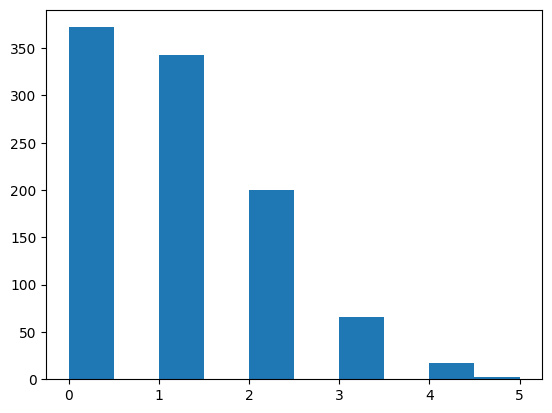

In [162]:
plt.hist(sample)